In [7]:

# Example graph (Adjacency List)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

color = {u: "WHITE" for u in graph}
distance = {u: float("inf") for u in graph}
parent = {u: None for u in graph}

print(color)
print(distance)
print(parent)

{'A': 'WHITE', 'B': 'WHITE', 'C': 'WHITE', 'D': 'WHITE', 'E': 'WHITE', 'F': 'WHITE'}
{'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}
{'A': None, 'B': None, 'C': None, 'D': None, 'E': None, 'F': None}


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

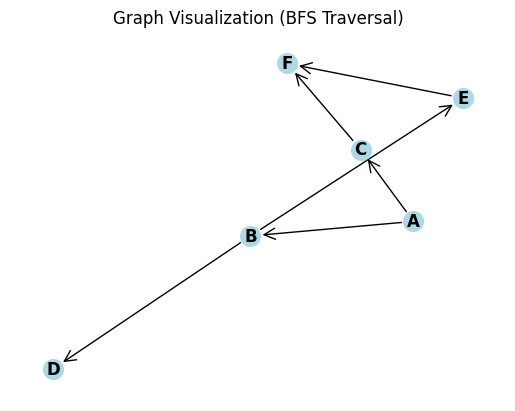

In [9]:

G = nx.DiGraph()

# Add edges
for u in graph:
    for v in graph[u]:
        G.add_edge(u, v)

# Define positions (spring_layout auto-arranges nicely)
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

plt.title("Graph Visualization (BFS Traversal)")
plt.axis("off")
plt.show()

In [10]:

from collections import deque

In [11]:

def BFS(graph, start):
    # Initialization
    color = {u: "WHITE" for u in graph}
    distance = {u: float("inf") for u in graph}
    parent = {u: None for u in graph}

    # Start node setup
    color[start] = "GRAY"
    distance[start] = 0
    parent[start] = None

    # Queue initialization
    Q = deque()
    Q.append(start)

    # BFS loop
    while Q:
        u = Q.popleft()
        for v in graph[u]:
            if color[v] == "WHITE":
                color[v] = "GRAY"
                distance[v] = distance[u] + 1
                parent[v] = u
                Q.append(v)
        color[u] = "BLACK"

    return distance, parent
     

In [12]:

# Run BFS starting from 'A'
distance, parent = BFS(graph, 'A')

print("Distances from source:", distance)
print("Parents in BFS tree:", parent)

Distances from source: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}
Parents in BFS tree: {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}


In [13]:

print("BFS Tree edges:")
for node, p in parent.items():
    if p is not None:
        print(f"{p} -> {node}")

BFS Tree edges:
A -> B
A -> C
B -> D
B -> E
C -> F


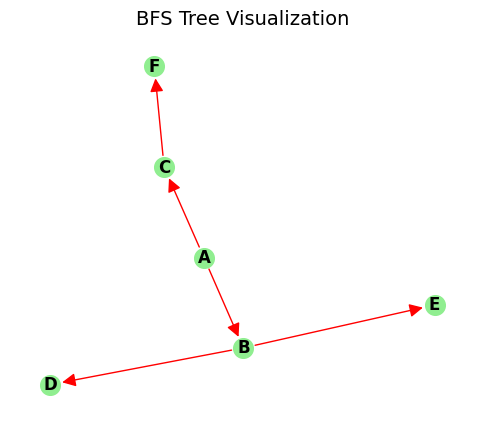

In [14]:

# --- Build BFS Tree using parent dictionary ---
BFS_tree = nx.DiGraph()
for node, p in parent.items():
    if p is not None:
        BFS_tree.add_edge(p, node)

# --- Draw BFS Tree ---
pos = nx.spring_layout(BFS_tree, seed=42)  # layout for nice positioning

plt.figure(figsize=(6, 5))
nx.draw_networkx_nodes(BFS_tree, pos, node_color="lightgreen", node_size=200)
nx.draw_networkx_edges(BFS_tree, pos, edge_color="red", arrows=True, arrowsize=20)
nx.draw_networkx_labels(BFS_tree, pos, font_size=12, font_weight="bold")

plt.title("BFS Tree Visualization", fontsize=14)
plt.axis("off")
plt.show()